In [56]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import tensorflow as tf

# Загрузка данных
train_data = pd.read_csv('/content/drive/MyDrive/train.csv')
test_data = pd.read_csv('/content/drive/MyDrive/test.csv')

print(train_data.head)

<bound method NDFrame.head of         Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL         65.0     8450   Pave   NaN      Reg   
1        2          20       RL         80.0     9600   Pave   NaN      Reg   
2        3          60       RL         68.0    11250   Pave   NaN      IR1   
3        4          70       RL         60.0     9550   Pave   NaN      IR1   
4        5          60       RL         84.0    14260   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1455  1456          60       RL         62.0     7917   Pave   NaN      Reg   
1456  1457          20       RL         85.0    13175   Pave   NaN      Reg   
1457  1458          70       RL         66.0     9042   Pave   NaN      Reg   
1458  1459          20       RL         68.0     9717   Pave   NaN      Reg   
1459  1460          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour Util

In [57]:
numerical_cols = train_data.select_dtypes(include=['int64', 'float64']).columns.tolist()
y = train_data['SalePrice'].values
numerical_cols.remove('SalePrice')  # Убираем целевую переменную

# Категориальные колонки
categorical_cols = train_data.select_dtypes(include=['object']).columns.tolist()

print("Числовые колонки:", numerical_cols)
print("Категориальные колонки:", categorical_cols)

Числовые колонки: ['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold']
Категориальные колонки: ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'Garag

In [58]:
# Заполнение пропущенных значений в числовых колонках медианой
train_data[numerical_cols] = train_data[numerical_cols].fillna(train_data[numerical_cols].median())
test_data[numerical_cols] = test_data[numerical_cols].fillna(test_data[numerical_cols].median())

# Заполнение пропущенных значений в категориальных колонках модой
train_data[categorical_cols] = train_data[categorical_cols].fillna(train_data[categorical_cols].mode().iloc[0])
test_data[categorical_cols] = test_data[categorical_cols].fillna(test_data[categorical_cols].mode().iloc[0])

In [59]:
# One-Hot Encoding для категориальных переменных
from sklearn.preprocessing import OneHotEncoder, StandardScaler

ohe = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
scaler = StandardScaler()


X_train_numeric = scaler.fit_transform(train_data[numerical_cols])
X_test_numeric = scaler.transform(test_data[numerical_cols])

X_train_categorical = ohe.fit_transform(train_data[categorical_cols])
X_test_categorical = ohe.transform(test_data[categorical_cols])

# Соединение обработанных данных
train_data = pd.DataFrame(
    np.hstack([X_train_numeric, X_train_categorical]),
    columns=list(numerical_cols) + list(ohe.get_feature_names_out(categorical_cols))
)

test_data = pd.DataFrame(
    np.hstack([X_test_numeric, X_test_categorical]),
    columns=list(numerical_cols) + list(ohe.get_feature_names_out(categorical_cols))
)
# Выравнивание колонок в train и test данных
train_data, test_data = train_data.align(test_data, join='left', axis=1, fill_value=0)

In [60]:
# Признаки и целевая переменная
X = train_data.drop(columns=['Id'])


# Разделение на тренировочный и валидационный наборы
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [79]:
print(y)
print(X_train.shape, test_data.shape)


[208500 181500 223500 ... 266500 142125 147500]
(1168, 287) (1459, 288)


In [67]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.layers import Dense, Dropout

# Создание модели
model = models.Sequential([
    layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dropout(0.4),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.4),
    layers.Dense(32, activation='relu'),
    layers.Dropout(0.4),
    layers.Dense(1)  # Выходной слой для регрессии
])

# Компиляция модели
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Просмотр архитектуры модели
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_11 (Dense)                     │ (None, 128)                 │          36,864 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 47,233 (184.50 KB)

 Trainable params: 47,233 (184.50 KB)

 Non-trainable params: 0 (0.00 B)

In [76]:
# Обучение модели
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=100,
    batch_size=32,
    verbose=1
)

Epoch 1/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2112519552.0000 - mae: 33273.3164 - val_loss: 1056361984.0000 - val_mae: 20227.4336
Epoch 2/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2338410752.0000 - mae: 35650.1875 - val_loss: 991128192.0000 - val_mae: 19622.7520
Epoch 3/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2092192000.0000 - mae: 33921.3828 - val_loss: 1036176256.0000 - val_mae: 20366.4395
Epoch 4/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2219559168.0000 - mae: 34961.9727 - val_loss: 1002685120.0000 - val_mae: 19923.9434
Epoch 5/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2636461312.0000 - mae: 36527.1328 - val_loss: 1159059200.0000 - val_mae: 22048.9668
Epoch 6/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2944238848.0000 - mae: 37315.7891 - val_loss: 1118182016.0000 - val_mae: 20690.1836
Epoch 7/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2236699136.0000 - mae: 34252.2227 - val_loss: 1085587584.0000 - val_mae: 20480.0410


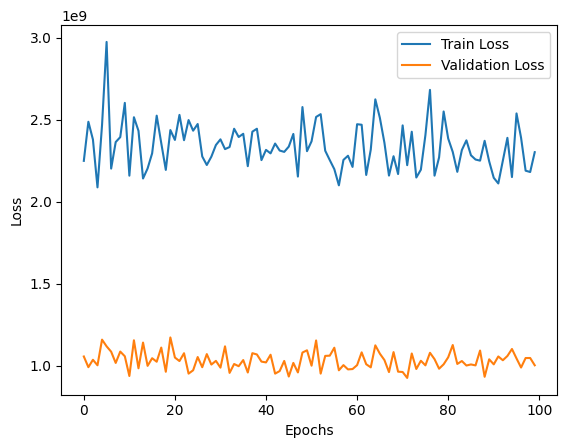

In [77]:
import matplotlib.pyplot as plt

# График потерь
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [80]:
# Предсказания на тестовой выборке

test_data = test_data.drop(columns=['Id'])
predictions = model.predict(test_data)

# Сохранение в файл
submission = pd.DataFrame({
    'Id': pd.read_csv('/content/drive/MyDrive/test.csv')['Id'],
    'SalePrice': predictions.flatten()
})
submission.to_csv('submission.csv', index=False)


46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
